# California Housing Prediction

##  Step 1: Choosing & Preparing the Dataset

Load & Explore the Data

In [10]:
import os
HOUSING_PATH = os.path.join("datasets", "housing2")

In [18]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "train.csv")
    return pd.read_csv(csv_path)

In [19]:
housing = load_housing_data()
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [20]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [22]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Check for missing values

In [15]:
print(housing.isnull().sum().sort_values(ascending=False))

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
MasVnrType        894
                 ... 
EnclosedPorch       0
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
Length: 80, dtype: int64


Visualize data distribution

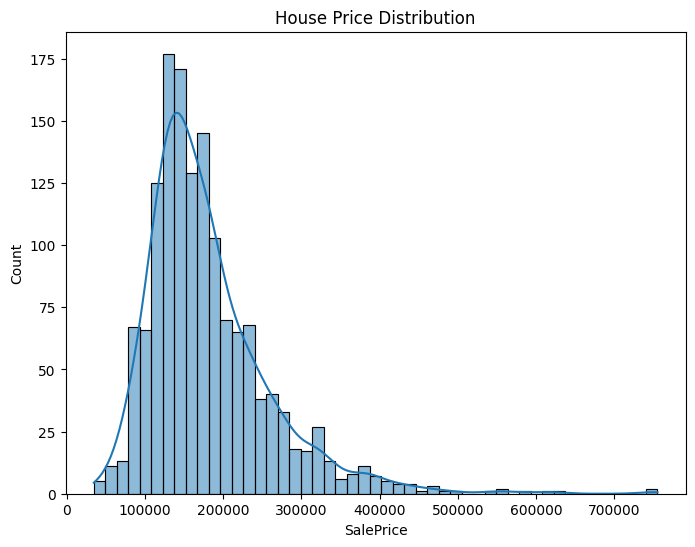

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(housing['SalePrice'], kde=True)
plt.title("House Price Distribution")
plt.show()


In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_num = housing.select_dtypes(include=['int64', 'float64']).copy()
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [49]:
housing_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [45]:
imputer.statistics_

array([7.3050e+02, 5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00,
       5.0000e+00, 1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02,
       0.0000e+00, 4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00,
       0.0000e+00, 1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00,
       0.0000e+00, 3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00,
       1.9800e+03, 2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       6.0000e+00, 2.0080e+03, 1.6300e+05])

## Step 2: Exploratory Data Analysis (EDA)

Check Feature Correlations

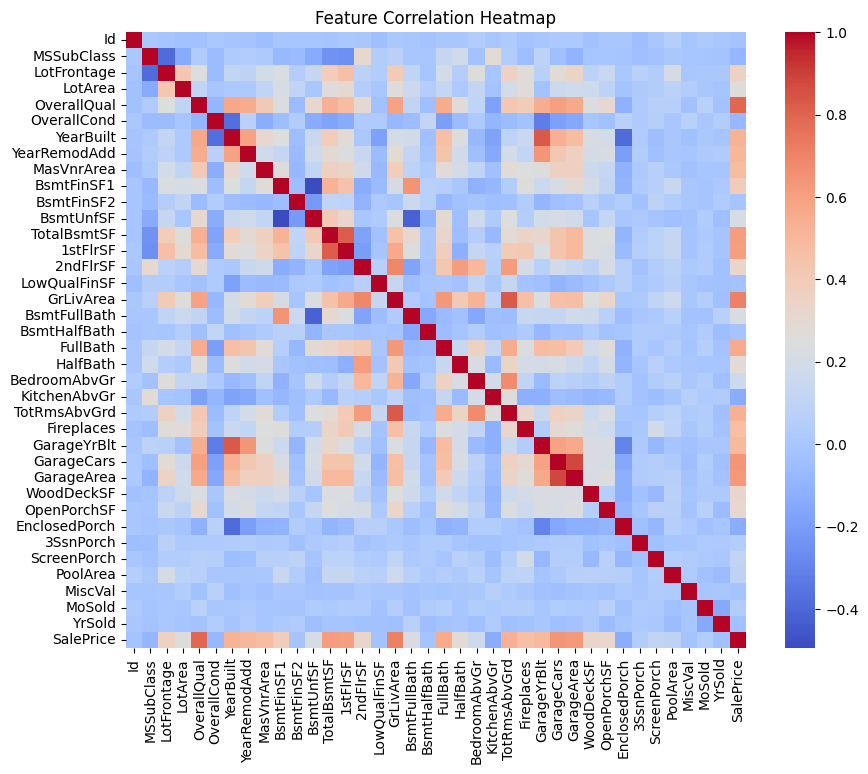

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing_num.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [47]:
corr_matrix = housing_num.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='GrLivArea', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='1stFlrSF', ylabel='TotalBsmtSF'>,
        <Axes: xlabel='GarageArea', ylabel='TotalBsmtSF'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='1stFlrSF', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>],
       [<Axes: xlabel='SalePrice', ylabel='1stFlrSF'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='1stFlrSF'>,
        <Axes: xlabel='GrLivA

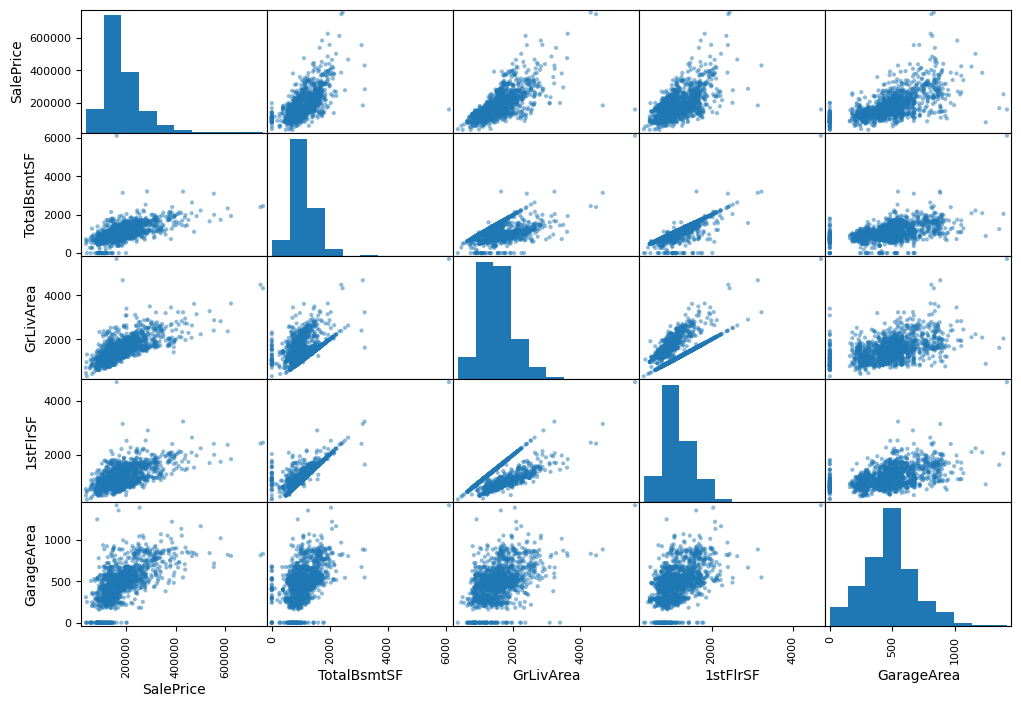

In [51]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "TotalBsmtSF", "GrLivArea",
 "1stFlrSF", "GarageArea"]

scatter_matrix(housing_num[attributes], figsize=(12, 8))

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

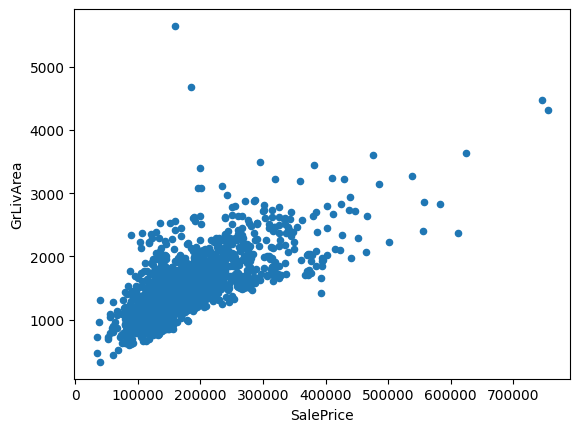

In [41]:
housing_num.plot(kind="scatter", x="SalePrice", y="GrLivArea")

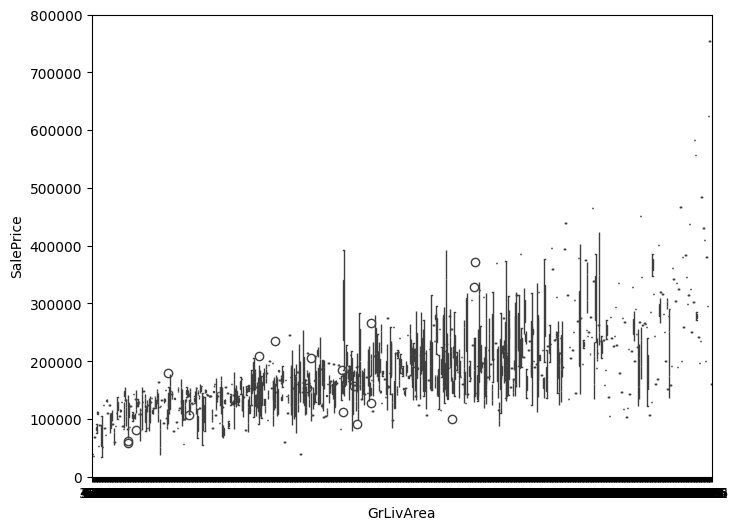

In [66]:
data = pd.concat([housing_num["SalePrice"], housing_num["GrLivArea"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data, x="GrLivArea", y="SalePrice")
fig.axis(ymin=0, ymax=800000);

<Axes: xlabel='SalePrice', ylabel='TotalBsmtSF'>

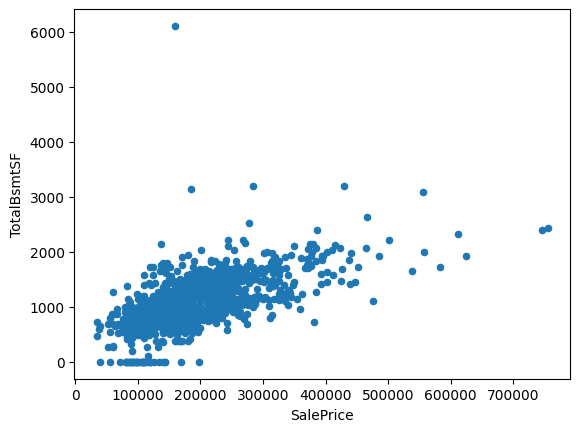

In [52]:
housing_num.plot(kind="scatter", x="SalePrice", y="TotalBsmtSF")

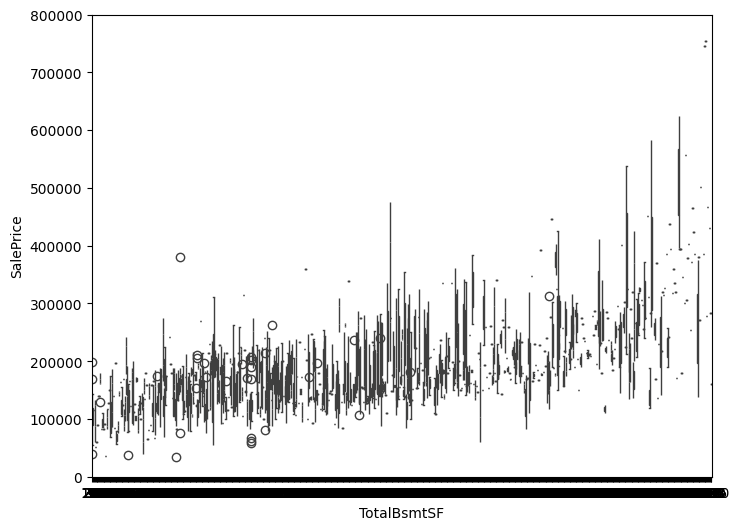

In [65]:
data = pd.concat([housing_num["SalePrice"], housing_num["TotalBsmtSF"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data, x="TotalBsmtSF", y="SalePrice")
fig.axis(ymin=0, ymax=800000);

<Axes: xlabel='SalePrice', ylabel='1stFlrSF'>

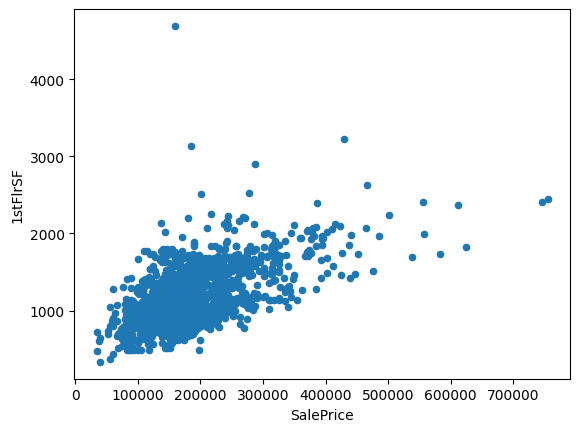

In [53]:
housing_num.plot(kind="scatter", x="SalePrice", y="1stFlrSF")

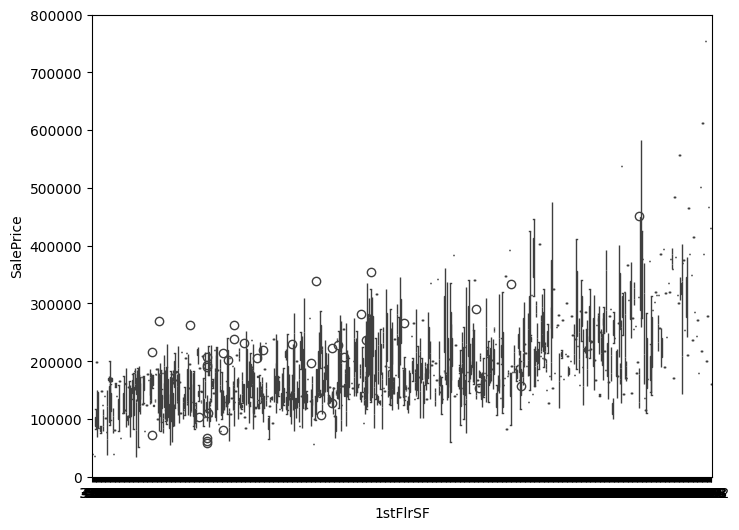

In [64]:
data = pd.concat([housing_num["SalePrice"], housing_num["1stFlrSF"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data, x="1stFlrSF", y="SalePrice")
fig.axis(ymin=0, ymax=800000);

<Axes: xlabel='SalePrice', ylabel='GarageArea'>

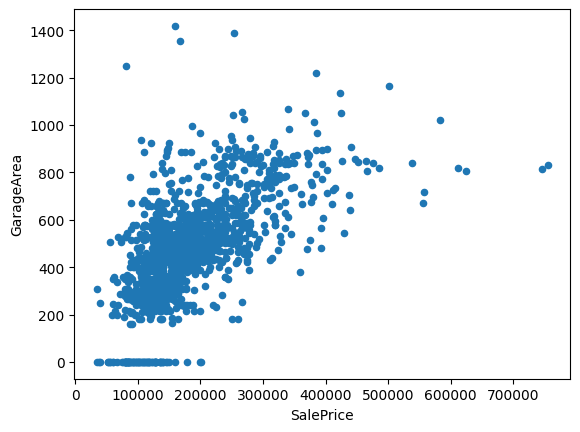

In [54]:
housing_num.plot(kind="scatter", x="SalePrice", y="GarageArea")

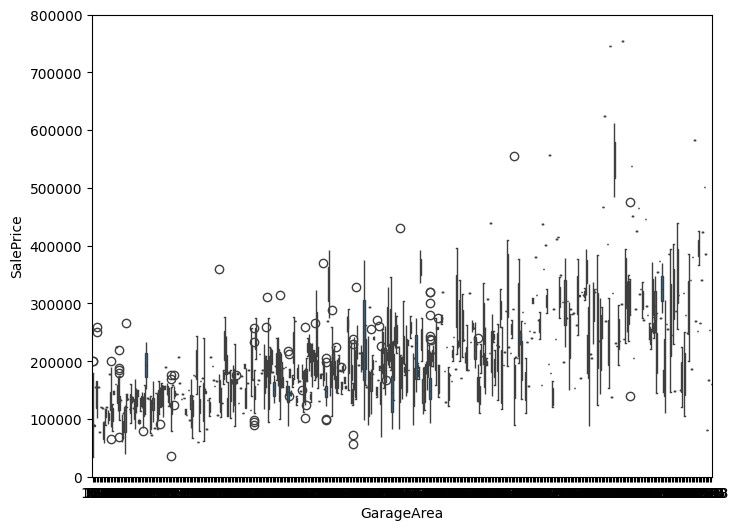

In [62]:
data = pd.concat([housing_num["SalePrice"], housing_num["GarageArea"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data, x="GarageArea", y="SalePrice")
fig.axis(ymin=0, ymax=800000);

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

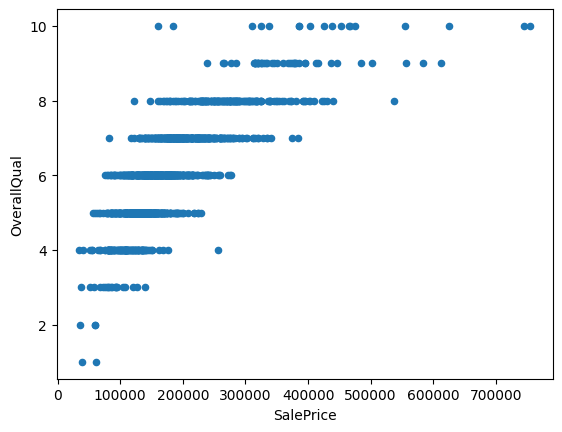

In [60]:
housing_num.plot(kind="scatter", x="SalePrice", y="OverallQual")

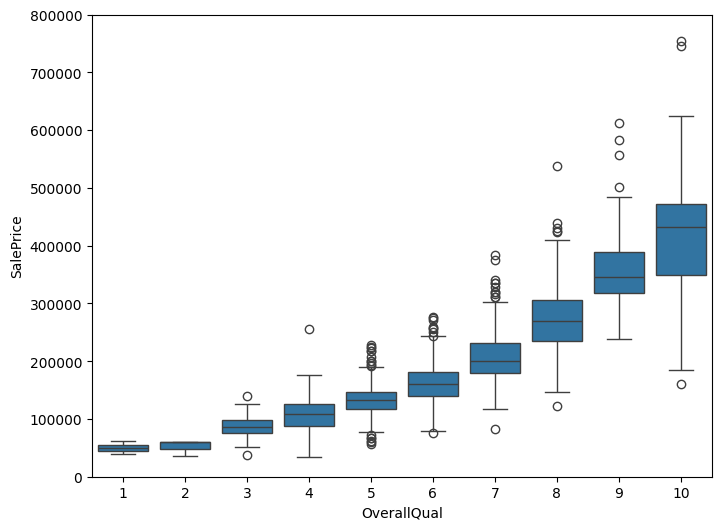

In [59]:
data = pd.concat([housing_num["SalePrice"], housing_num["OverallQual"]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(data=data, x="OverallQual", y="SalePrice")
fig.axis(ymin=0, ymax=800000);

In [72]:
housing.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)


In [75]:
housing.fillna(housing.mode().iloc[0], inplace=True)


In [76]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [77]:
housing = pd.get_dummies(housing, drop_first=True)

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing[['GrLivArea', 'TotalBsmtSF']] = scaler.fit_transform(housing[['GrLivArea', 'TotalBsmtSF']])